In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from logbin import logbin
from scipy.optimize import curve_fit
import numpy as np
from ba_network import ba_network
from utils import figures_folder

Note: Should compare how long this takes compared to a built in BA model, which is probably much quicker

In [3]:
edges_lists = []
nodes_lists = []
n_values = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]
m_values = [1, 2, 4, 8, 16]

for m in m_values:
    edges = []
    nodes = []
    for n in n_values:
        G = ba_network(n, m)
        edges.append(G.number_of_edges())
        nodes.append(G.number_of_nodes())
        print(n, m)
    edges_lists.append(edges)
    nodes_lists.append(nodes)

64 1
128 1
256 1
512 1
1024 1
2048 1
4096 1
8192 1
16384 1
32768 1
64 2
128 2
256 2
512 2
1024 2
2048 2
4096 2
8192 2
16384 2
32768 2
64 4
128 4
256 4
512 4
1024 4
2048 4
4096 4
8192 4
16384 4
32768 4
64 8
128 8
256 8
512 8
1024 8
2048 8
4096 8
8192 8
16384 8
32768 8
64 16
128 16
256 16
512 16
1024 16
2048 16
4096 16
8192 16
16384 16
32768 16


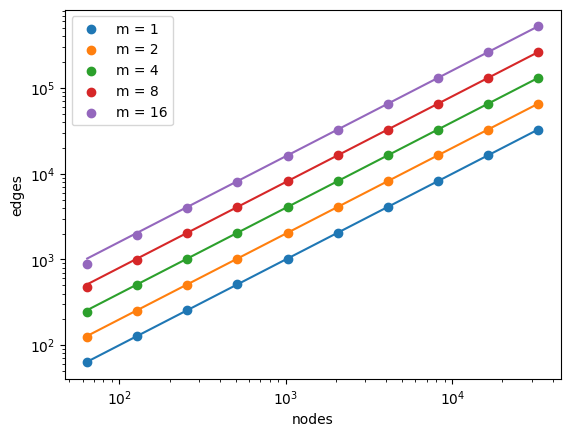

In [36]:
x_vals_count = 100

for i in range(len(edges_lists)):
    plt.scatter(nodes_lists[i], edges_lists[i], label="m = %i" % m_values[i])
    x_vals = np.linspace(nodes_lists[i][0], nodes_lists[i][-1], x_vals_count)
    plt.plot(x_vals, m_values[i]*x_vals)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('nodes')
plt.ylabel('edges')
plt.legend()

plt.savefig(figures_folder + 'tests')

# Testing Degree Distribution

In [2]:
# n = 300000
n = 100000
m = 4
# G = ba_network(n, m)
G = nx.barabasi_albert_graph(n, m)
degree_sequence = sorted((d for _, d in G.degree()))

In [3]:
# predicted average degree
print(2*m*(m+1))
# measured average degree
print(np.mean(degree_sequence))

40
7.99968


In [4]:
degrees, counts = np.unique(degree_sequence, return_counts=True)
total_count = len(degree_sequence)
probs = [c/total_count for c in counts]

In [5]:
def p_infinity(m, k):
    return 2*m*(m+1)/(k*(k+1)*(k+2))

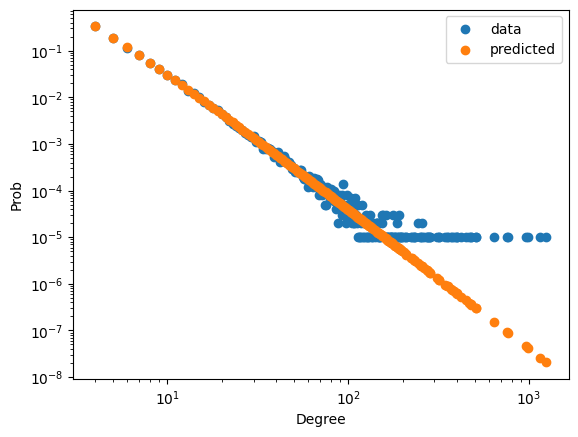

In [23]:
plt.scatter(degrees, probs, label='data')
plt.scatter(degrees, p_infinity(m, degrees), label='predicted')
plt.xlabel("Degree")
plt.ylabel("Prob")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [38]:
# normalisation checks
# predicted 
print(np.sum(probs))
# data
print(np.sum(p_infinity(m, degrees)))

1.0
0.9914405460947634


## Optimisations

Using sets is probably the best way to make everything run faster, can use dictionaries but these have a larger memory footprint.

# Calculating The Predicted Cutoff Values

In [60]:
from scipy import optimize

def calc_expected_value(k):
    m = 10
    N = 100000
    return (2*N*m*(m+1))/(k*(k+1)*(k+2)) - 1

result = optimize.newton(calc_expected_value, 1.5)
result

279.20512267529784

### Testing the 